Multivariate Linear Regression

In [1]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

%matplotlib notebook

In [2]:
def create_feature_matrix(sample_size, n_features, x_min, x_max):
    '''creates random feature vectors based on a lienar function in a given interval
    
    Args:
        sample_size: number feature vectors
        n_features: number of features for each vector
        x_min: lower bound value ranges
        x_max: upper bound value ranges
    
    Returns:
        x: 2D array containing feature vecotrs with shape (sample_size, n_features)
     '''
    #initialize array containing feature vecotrs for all trainings data
    x = np.random.uniform(low=x_min, high=x_max, size=(sample_size, n_features))
    return x

In [3]:
sample_size = 100
n_features = 2
x_min = [1.5, -0.5]
x_max = [11., 5.0]

X = create_feature_matrix(sample_size, n_features, x_min, x_max)
X

array([[10.09225005,  3.89182859],
       [ 2.1741235 ,  4.46720872],
       [ 6.91011756,  4.15871876],
       [ 3.96884373,  3.86887254],
       [ 1.62980489,  3.36622866],
       [ 4.60422127,  1.7237681 ],
       [ 9.45278668, -0.49453987],
       [ 1.61062444,  3.47781199],
       [ 2.50826841,  0.01270591],
       [ 2.48537461,  3.9560393 ],
       [ 2.29217133,  1.89282007],
       [ 5.88311479,  2.49943183],
       [10.49689557,  0.25232527],
       [ 9.28956584,  3.31818248],
       [ 7.8679104 ,  1.59841258],
       [10.25016907,  3.1699275 ],
       [ 9.77462533,  1.52311924],
       [ 6.70883585,  3.66375661],
       [ 5.48776795,  1.38850443],
       [ 4.86955911,  0.5453433 ],
       [ 5.73304163,  1.81070546],
       [ 3.85425524,  2.39839592],
       [ 5.30031177,  1.5907829 ],
       [ 9.00390856,  0.49334457],
       [ 5.54964651,  1.01831835],
       [ 7.34908847,  3.53533141],
       [ 7.03415049,  3.41885263],
       [ 7.42264823,  0.65030912],
       [10.61102028,

In [4]:
assert len(X[:,0]) == sample_size
assert len(X[0,:]) == n_features
for i in range(n_features):
    assert np.max(X[:,i]) <= x_max[i]
    assert np.min(X[:,i]) >= x_min[i]

### Linear Hypothesis

In [5]:
def linear_hypothesis(thetas):
    ''' Combines given list argument in a linear equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a linear function based on thetas and x
    '''
    #return new X with additional feature x0=1. for each example 
    def create_new_X (x):
        x0 = np.ones((len(x[:,0]),1))
        return np.hstack((x0,x))

    return lambda x: create_new_X(x).dot(thetas) #np.matmul(make_new_X (x), thetas)

In [6]:
assert len(linear_hypothesis([.1,.2,.3])(X)) == sample_size

### Generate Target Values


In [7]:
def generate_targets(X, theta, sigma):
    ''' Combines given arguments in a linear equation with X, 
    adds some Gaussian noise and returns the result
    
    Args:
        X: 2D numpy feature matrix
        theta: list of coefficients
        sigma: standard deviation of the gaussian noise
        n 
    Returns:
        target values for X
    '''
    
    return linear_hypothesis(theta)(X) + sigma * np.random.randn(len(X))

In [8]:
theta = (2., 3., -4.)
sigma = 3.
y = generate_targets(X, theta, sigma)

In [9]:
assert len(y) == sample_size

### Plot The Data

In [10]:
%matplotlib notebook

def plot_data_scatter(features, targets):
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: targets
    """
    assert (len(features)==len(targets))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(features[:,0], features[:,1], targets, marker = 'o', c='#bc13fe')
    ax.set_xlabel('$ x _0 $')
    ax.set_ylabel('$ x _1 $')
    ax.set_zlabel('$y$')
    plt.show()
    

<IPython.core.display.Javascript object>


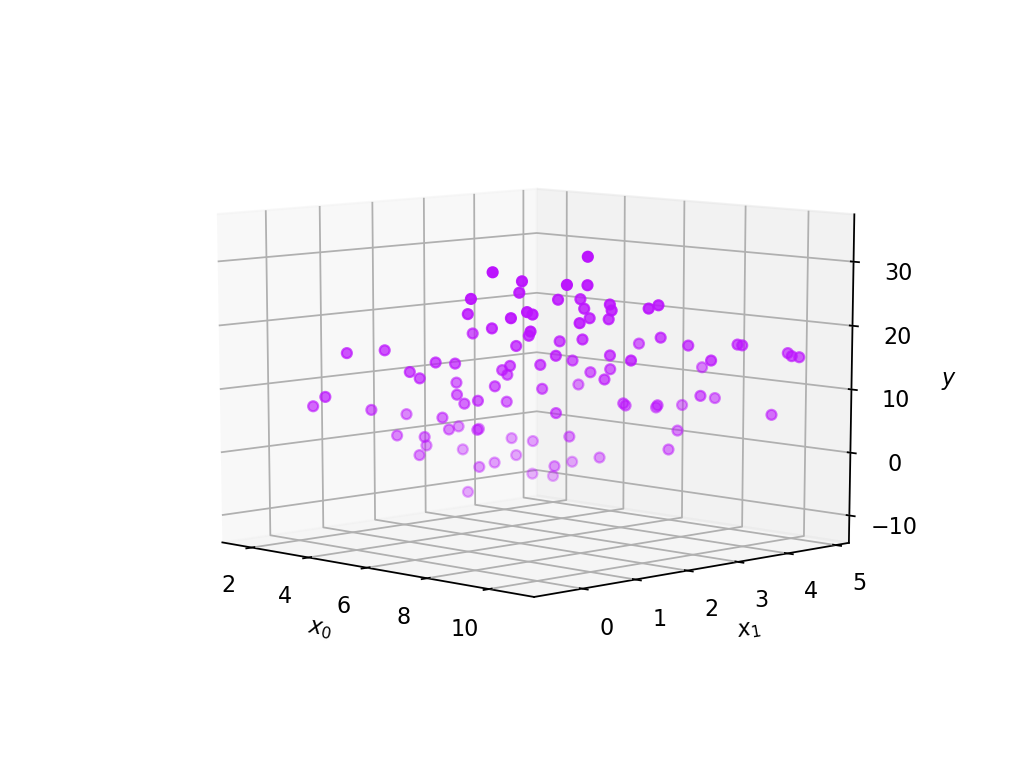

In [11]:
plot_data_scatter(X, y)

### Cost Function
\begin{equation}
    J_{\mathcal D}(\Theta)=\frac{1}{2m}\sum_{i=1}^{m}{(h_\Theta(\vec x^{(i)})-y^{(i)})^2}
\end{equation}

In [12]:
def mse_cost_function(x, y):
    ''' Implements MSE cost function as a function J(theta) on given traning data 
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta) that models the cost function
    '''
    assert(len(x) == len(y))
    #print(x)
    return lambda theta: (1./(2. * len(x))) * ((linear_hypothesis(theta)(x) - y)**2).sum()
    

In [13]:
J = mse_cost_function(X, y)
print(J(theta))

3.6084397656579372


###  Gradient Descent


\begin{equation}
    \theta_{j}^{new} \leftarrow \theta_{j}^{old} - \alpha * \frac{\partial}{\partial\theta_{j}} J(\vec \theta^{old})
\end{equation}

In [14]:
def update_theta(x, y, theta, learning_rate):
    ''' Updates learnable parameters theta
    
    Args:
        x: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient 
        
    Returns:
        theta: Updated theta vector

    '''
    def create_new_X (x_old):
        x0 = np.ones((len(x_old[:,0]),1))
        return np.hstack((x0,x_old))
    
    #prediction value (x is updated in linear_hypothesis func)
    h = linear_hypothesis(theta)(x)
    #X with x0=1 feature
    x_updated = create_new_X (x)
    #vecror Form
    #theta_updated = theta - learning_rate * (1. / len(x)) * ((h - y) * x_updated).sum()
    #matrix Form
    theta_updated = theta - learning_rate * (1. / len(x))* x_updated.T.dot(h - y)
    return theta_updated

In [15]:
def gradient_descent(learning_rate, theta, iterations, x, y, cost_function):
    ''' Minimize theta values of a linear model based on MSE cost function
    
    Args:
        learning_rate: scalar, scales the negative gradient 
        theta: initial theta values
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    history_cost = np.zeros(iterations)
    history_theta = np.zeros((iterations, len(theta)))
    theta_temp = theta
    
    for i in range(iterations):
        history_theta[i] = theta_temp
        history_cost[i] = cost_function(x,y)(theta_temp)
        theta_temp = update_theta(x, y, theta_temp, learning_rate)
    
    return history_cost, history_theta
    
    
    
    

### Training and Evaluation

In [16]:
alpha = 0.01 # appropriate value
nb_iterations = 100 # appropriate value
start_values_theta = [1., -2., 3.] # appropriate values
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y,  mse_cost_function)

print(history_cost)
print(history_theta)

[306.5471865  135.88951543  96.61796374  84.6184      78.46193748
  73.727169    69.49159525  65.55314944  61.85867743  58.38634443
  55.12140736  52.05119299  49.1640286   46.44898775  43.89580582
  41.4948323   39.23699244  37.11375267  35.11708816  33.23945255
  31.47374938  29.81330529  28.25184477  26.78346648  25.40262088
  24.10408932  22.88296428  21.73463083  20.65474915  19.63923821
  18.68426024  17.78620631  16.94168264  16.14749779  15.4006506
  14.69831882  14.03784847  13.41674382  12.8326579   12.28338369
  11.76684574  11.28109235  10.82428818  10.39470728   9.99072665
   9.61082002   9.25355213   8.91757327   8.60161423   8.30448145
   8.02505253   7.76227199   7.51514728   7.28274503   7.0641875
   6.8586493    6.66535424   6.48357241   6.31261741   6.15184378
   6.00064451   5.85844881   5.72471991   5.59895304   5.48067352
   5.36943499   5.26481769   5.16642687   5.07389134   4.98686202
   4.90501066   4.82802856   4.75562545   4.68752835   4.62348055
   4.5632406

In [17]:
def plot_progress(costs):
    """ Plots the costs over the iterations
    
    Args:
        costs: history of costs
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.arange(len(costs)) 
    ax.plot(x, costs)
    ax.set_xlabel('Iterationen')
    ax.set_ylabel('Kosten')
    ax.set_title('Fortschritt')

    plt.show()

<IPython.core.display.Javascript object>


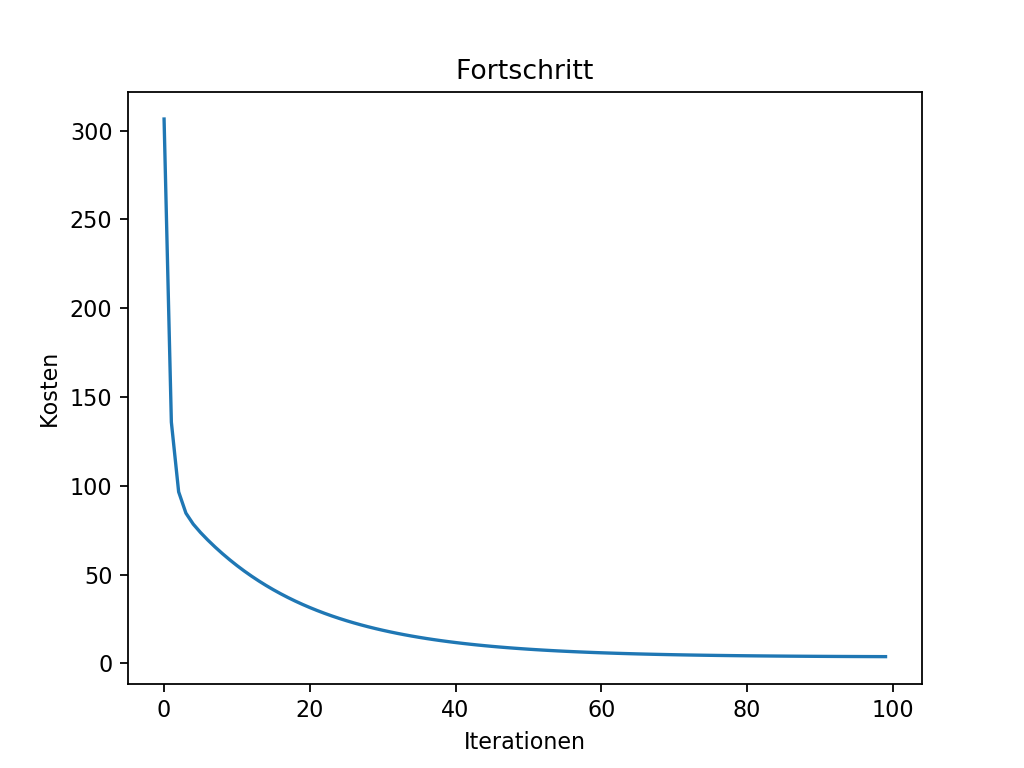

costs before the training:	  306.5471864988167
costs after the training:	  3.8283220450808164


In [18]:
plot_progress(history_cost)
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

In [19]:
def evaluation_plt(x, y, final_theta):
    ''' Plots the data x, y together with the final model
    
    Args:
        cost_hist: vector, history of all cost values from a opitmization
        theta_0: scalar, model parameter for boundary
        theta_1: scalar, model parameter for boundary
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''
    
    assert (len(x)==len(y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[:,0], x[:,1], y, marker = 'o', c='#bc13fe')
    ax.set_xlabel('$ x _1 $')
    ax.set_ylabel('$ x _2 $')
    ax.set_zlabel('$y$')
    
    
    # Make data
    x1_space = np.linspace(np.min(x[:,0]), np.max(x[:,0]), len(x))
    x2_space = np.linspace(np.min(x[:,1]), np.max(x[:,1]), len(x))
    X1, X2 = np.meshgrid(x1_space, x2_space)
    Y = final_theta[0] + final_theta[1] * X1 + final_theta[2] * X2
    # Plot the surface
    surf = ax.plot_surface(X1, X2, Y, cmap='rainbow', alpha=0.5, linewidth=0, antialiased=True)
    
    plt.show()

<IPython.core.display.Javascript object>


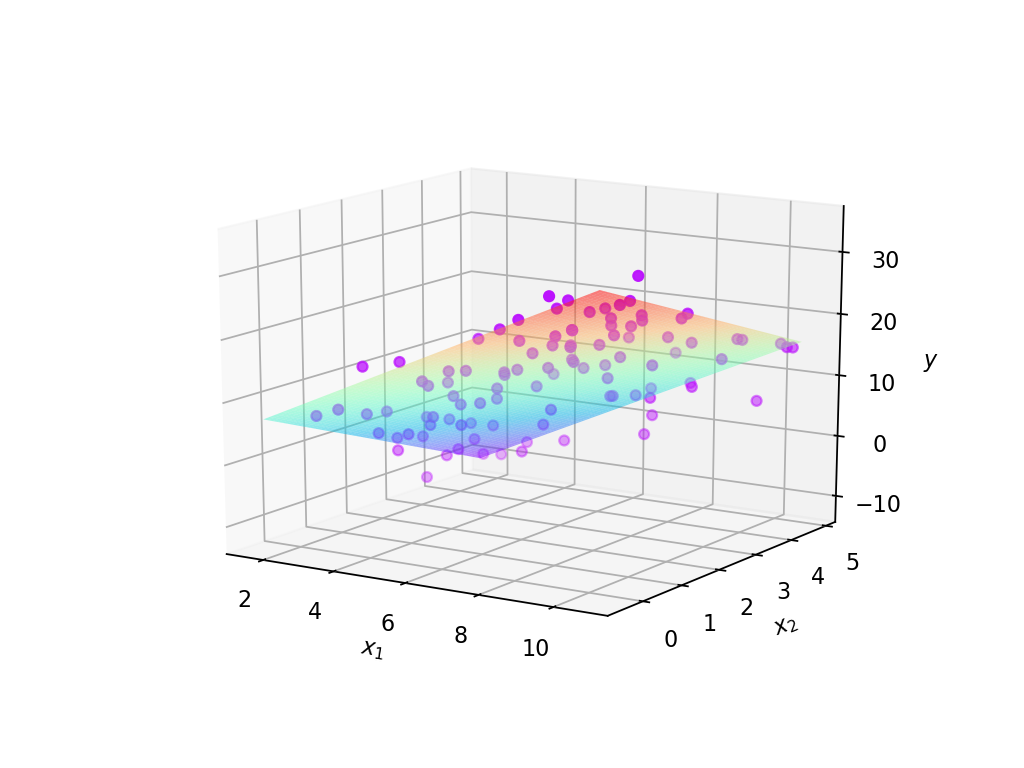

thetas before the training:	 [ 1. -2.  3.]
thetas after the training:	 [ 0.76526292  2.91700454 -3.35961309]


In [20]:

evaluation_plt(X, y, history_theta[-1])
print("thetas before the training:\t", history_theta[0])
print("thetas after the training:\t", history_theta[-1])